## Table Of Content:

* [1.Polynomial Regression.](#0)
* [1.1 Polynomial Curve Fitting.](#1)
* [2.Least Square Error.](#2)
* [3.Model selection ](#3)
* [4.$E_{RMS}$ vs $M$.](#4)
* [5.Remedy For Over-fitting](#5)
* [6.Regularization ](#6)
* [7.$E_{RMS}$ vs $\ln\lambda$.](#7)

## 1.Polynomial Regression.<a class="anchor" id="0"></a>

In [Linear Regression with multiple variables.](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Linear%20Regression%20With%20Multiple%20Variable/Linear%20Regression%20With%20Multiple%20Variable%20.ipynb) we tune the multiple parameters ${\theta}s$ associated with different features $x_0,x_1,x_2,x_3..x_n$  to fit the linear model and estimate the score.Here we will talk about the polynomial regression which is a special case of the multiple linear regression [here](https://stats.stackexchange.com/questions/92065/why-is-polynomial-regression-considered-a-special-case-of-multiple-linear-regres) you will get more insight.  

## 1.1.Polynomial Curve Fitting.<a class="anchor" id="1"></a>


We begin by introducing a simple regression problem,Suppose we observe a real-valued input variable x and we wish to use this observation to predict the value of a real-valued target variable t. For the present purposes, here we will consider an artificial example using synthetically generated data. The data for this example is generated from the function $\sin(2\pi x)$ with random noise included in the target values, as described below in python.

Now suppose that we are given a training set comprising $N$ observations of $x$, written
$ x\equiv
\begin{bmatrix}x_1,\cdot \cdot  x_N \end{bmatrix}^T
$, together with corresponding observations of the values of $t$, denoted 
$ t\equiv\begin{bmatrix}  t_1,\cdot \cdot \cdot , t_N \end{bmatrix}^T$. 
below Figure shows a plot of a training set comprising $N = 10$ data points. The input data set $x$ in  below `Figure 1` was generated by choosing values of $x_n$, for $n = 1, . . . , N$, spaced uniformly in range $[0, 1]$, and the target
data set $t$ was obtained by first computing the corresponding values of the function $\sin(2\pi x)$ and then adding a small level of random noise having a Gaussian distribution to each such point in order to obtain the corresponding value $t_n$. By generating data in this way, we are capturing a property of many real data sets, namely that they possess an underlying regularity, which we wish to learn, but that individual observations are corrupted by random noise. 

Before going ahead with python code,add required packages.Here along with the usual packages like `numpy` and `matplotlib` we will add the `prml.preprocess `package.`prml.preprocess` package is available [here](https://github.com/ctgk/PRML), where all the algorithm from the book **Pattern Recognition and Machine Learning-Bishop"** is implemented. The same book as reference which I am following here and even for our [book](https://github.com/AnilSarode/Machine-Learning-Digital-Book-).         

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

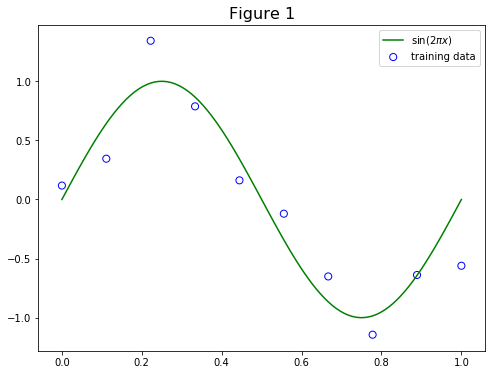

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    #print(x.shape)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)
fig = plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.title('Figure 1',fontsize=16)
plt.legend()
plt.show()


## 2.Least Square Error.<a class="anchor" id="2"></a>

Our goal is to exploit this training set in order to make predictions of the value $\hat t $ of the target variable for some new value $\hat x $ of the input variable. This involves implicitly trying to discover the underlying function $ \sin(2\pi x)$. This is intrinsically a difficult problem as we have to generalize from a finite data set. Furthermore the observed data are corrupted with noise, and so for a given $\hat x$ there is uncertainty as to the appropriate value for $\hat t $.

Probability theory, not discussed here will provides a framework for expressing such uncertainty in a precise and quantitative manner, and decision theory,again not  discussed here, allows us to exploit this probabilistic representation in order to make predictions that are optimal according to appropriate criteria.

For the moment, however, we shall proceed rather informally and consider a simple approach based on curve fitting. In particular, we shall fit the data using a polynomial function of the form.

$$
y(x,{\theta})= {\theta}_0 + {\theta}_1{x}+{\theta}_1{x}^{2}+...+{\theta}_M{x}^M =\sum_{j=0}^M{\theta}_j{x}^{j} 
$$

where $M$ is the order of the polynomial, and $x_j$ denotes $x$ raised to the power of j.The polynomial coefficients $ {\theta}_0, . . . , {\theta}_M $ are collectively denoted by the vector ${\large\theta}$.Note that, although the polynomial function $\large y(x, {\large\theta})$ is a nonlinear function of $x$, it is a linear function of the coefficients ${\large\theta}$. Functions, such as the polynomial, which are linear in the unknown parameters have important properties and are called linear models.

The values of the coefficients will be determined by fitting the polynomial to the training data. This can be done by minimizing an error function that measures the misfit between the function $\large y(x, {\large\theta})$ ,for any given value of ${\large\theta}$, and the training set data points or target points. One simple choice of error function, which is widely used, is given by the sum of the squares of the errors (or least square error as we did in [Simple Linear Regression](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Simple%20Linear%20Regression/Simple%20Linear%20Regression%20.ipynb)) between the predictions $\large y(x, {\large\theta})$ for each data point $x_n$ and the corresponding target values $t_n$, so that we minimize

$$
\large E({\large\theta})=\frac{1}{2}\sum_{n=1}^N\{y(x_n, {\large\theta})-t_n\}^{2}
$$

where the factor of 1/2 is included for later convenience.For the moment we simply note that it is a nonnegative quantity that would be zero if, and only if, the function $\large y(x, {\large\theta})$ were to pass exactly through each training data point.The geometrical interpretation of the sum-of-squares error function is illustrated in below Figure.

![data](LSE1.png)
The above error function corresponds to (one half of) the sum of the squares of the displacements (shown by the vertical green bars) of each data point from the function $\large y(x, {\theta})$.


We can solve the curve fitting problem by choosing the value of ${\large\theta}$ for which $\large E({\large\theta})$ is as small as possible. Because the error function is a quadratic function of the coefficients ${\theta}$, its derivatives with respect to the coefficients will be linear in the elements of ${\theta}$, and so the minimization of the error function has a unique solution,denoted by $\large\hat{\theta}$, which can be found in closed form. The resulting polynomial is given by the function $\large y(x, \large\hat{\theta})$.

## 3.Model selection <a class="anchor" id="3"></a> 

There remains the problem of choosing the order $M$ of the polynomial, and as we shall see this will turn out to be an example of an important concept called model comparison or model selection. In Figure 2 or subplots below, we show four examples of the results of fitting polynomials having orders $ M = 0, 1, 3,$ and $9$ to the data set shown in Figure 1.here we are using the `LinearRegression()` to train and fit the model.

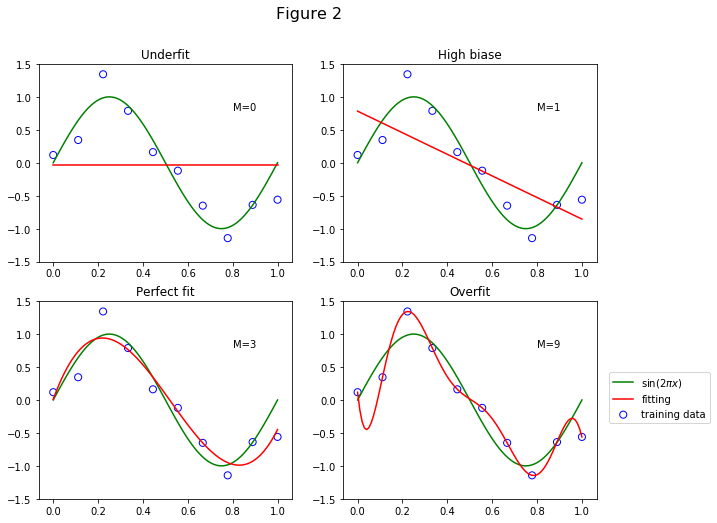

In [3]:
name_list=['Underfit','High biase','Perfect fit','Overfit']
fig = plt.figure(figsize=(10, 8))
fig.suptitle("Figure 2", fontsize=16)
for i, degree in enumerate([0, 1, 3, 9]):
    ax1=plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    #ax1.set_title("fig{}".format(i))
    ax1.set_title(name_list[i])
    plt.annotate("M={}".format(degree), xy=(0.8, 0.8))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()


We notice that the constant $(M = 0)$ and first order $(M = 1)$ polynomials give rather poor fits to the data and consequently rather poor representations of the function $sin(2\pi x)$.**This behaviour is term as under-fit or high bias.** The third order $(M = 3)$ polynomial seems to give the best fit to the function $sin(2\pi x)$ of the examples shown in `Figure 2` plot third Perfect fit. When we go to a much higher order polynomial $(M = 9)$, we obtain an excellent fit to the training data. In fact, the polynomial passes exactly through each data point and $\large E({\large\hat\theta}) = 0$.i.e. very low bias. However, the fitted curve oscillates wildly and gives a very poor representation of the function $sin(2\pi x)$ or for the  new data points  from the $sin(2\pi x)$ it shows high **variance**. **This latter behaviour is known as over-fitting.**

## 4.$E_{RMS}$ vs $M$. <a class="anchor" id="4"></a>

As we have noted earlier, the goal is to achieve good generalization by making accurate predictions for new data. We can obtain some quantitative insight into the dependence of the generalization performance on $M$ by considering a separate test set comprising $100$ data points generated using exactly the same procedure used
to generate the training set points but with new choices for the random noise values included in the target values. For each choice of M, we can then evaluate the residual value of $\large E({\large\hat\theta})$ given by error equation for the training data, and we can also evaluate $\large E({\large\hat\theta})$for the test data set. It is sometimes more convenient to use the root-mean-square (RMS) error defined by

$$
E_{RMS}=\sqrt{\frac{2 E({\hat\theta})}{N}}
$$

in which the division by $N$ allows us to compare different sizes of data sets on an equal footing, and the square root ensures that $E_{RMS}$ is measured on the same scale (and in the same units) as the target variable t. Graphs of the training and test set $RMS$ errors are shown, for various values of $M$, in `Figure 3`. The test set error is a measure of how well we are doing in predicting the values of $t$ for new data observations of $x$. We note from `Figure 2` that small values of $M$ give relatively large values of the test set error, and this can be attributed to the fact that the corresponding polynomials are rather inflexible and are incapable of capturing the oscillations in the function $sin(2\pi x)$. Values of $M$ in the range $3 \leq M \leq 8$ give small values for the test set error, and these also give reasonable representations of the generating function $sin(2\pi x)$, as can be seen, for the case of $M = 3$, from Figure 2 perfect fit.

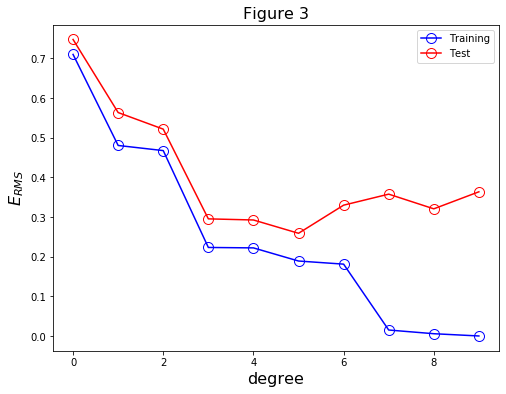

In [4]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

fig = plt.figure(figsize=(8, 6))
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.title('Figure 3',fontsize=16)
plt.legend()
plt.xlabel("degree",fontsize=16)
plt.ylabel(r"$E_{RMS}$",fontsize=16)
plt.show()

For $M = 9$, the training set error goes to zero, as we might expect because this polynomial contains 10 degrees of freedom corresponding to the $10$ coefficients ${\theta}_0$, . . . , ${\theta}_9$, and so can be tuned exactly to the $10$ data points in the training set. However, the test set error has become very large and, as we saw in `Figure 2`,Overfit plot,the corresponding function $\large y(x, \large\hat{\theta})$ exhibits wild oscillations.

This may seem paradoxical because a polynomial of given order($M=9$) contains all lower order polynomials as special cases. The $M = 9$ polynomial is therefore capable of generating results at least as good as the $M = 3$ polynomial.But actually the for $M=9$ the results are poor. 

Furthermore, we might suppose that the best predictor of new data would be the function $sin(2\pi x)$ from which the data was generated ( this is indeed the true). We know that a power series expansion of the function $sin(2\pi x)$ contains terms of all orders, so we might expect that results should improve monotonically as we increase M.but this is not happen,why?

We can gain some insight into the problem by examining the values of the coefficients $\large\hat{\theta}$ obtained from polynomials of various order, as shown in below Table . We see that, as M increases, the magnitude of the coefficients or parameters ${\theta}s$ typically gets **larger**. In particular for the $M = 9$ polynomial, the coefficients have become finely tuned to the data by developing large positive and negative values so that the corresponding polynomial function matches each of the data points exactly, **but between data points (particularly near the ends of the range) the function exhibits the large oscillations observed in Figure 2.Intuitively, what is happening is that the more flexible polynomials with larger values of $M$ are becoming increasingly tuned to the random noise on the target values.**

Here I am using `scikit-learn` and `pandas data frame` to fit the model and to get the parameter values for $M= 0,1,6,9 $.

In [5]:
from sklearn import linear_model
import pandas as pd 

Coef=[]
Intercept=[]
for i, degree in enumerate([0, 1, 6, 9]):

    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    Coef.append(model.coef_)
    Intercept.append(model.intercept_)


In [6]:
Coef=pd.DataFrame(Coef,index =['M=0', 'M=1', 'M=6', 'M=9'],columns =[r'${\hat\theta}_0$',r'${\hat\theta}_1$',r'${\hat\theta}_2$',r'${\hat\theta}_3$',r'${\hat\theta}_4$',r'${\hat\theta}_5$',r'${\hat\theta}_6$',r'${\hat\theta}_7$',r'${\hat\theta}_8$',r'${\hat\theta}_9$'])
Intercept=pd.DataFrame(Intercept,columns=['0'])
Coef[r'${\hat\theta}_0$']=Intercept['0'].values
Coef=Coef.fillna('0')

In [7]:
Coef

,${\hat\theta}_0$,${\hat\theta}_1$,${\hat\theta}_2$,${\hat\theta}_3$,${\hat\theta}_4$,${\hat\theta}_5$,${\hat\theta}_6$,${\hat\theta}_7$,${\hat\theta}_8$,${\hat\theta}_9$
M=0,-0.035921,0,0,0,0,0,0,0,0,0
M=1,0.783019,-1.63788,0,0,0,0,0,0,0,0
M=6,0.087038,-2.36305,94.5229,-428.175,736.798,-563.096,161.694,0,0,0
M=9,0.117859,-32.2314,552.576,-2728.57,4762.78,2031.29,-19359.5,28382.5,-17856.2,4246.73


## 5.Remedy For Over-fitting <a class="anchor" id="5"></a>

It is also interesting to examine the behaviour of a given model as the size of the data set is varied, as shown in `Figure 4`. We see that, for a given model complexity, the over-fitting problem become less severe as the size of the data set increases. Another way to say this is that the larger the data set, the more complex (in other words more flexible) the model that we can afford to fit to the data. One rough heuristic that is sometimes advocated is that the number of data points should be no less than some multiple (say 5 or 10) of the number of adaptive parameters ${\theta}s$ in the model. However,the number of parameters is not necessarily the most appropriate measure of model complexity.

Also, there is something rather unsatisfying about having to limit the number of parameters in a model according to the size of the available training set. It would seem more reasonable to choose the complexity of the model according to the complexity of the problem being solved.

We shall see later that the **least squares** approach to finding the model parameters represents a specific case of **maximum likelihood** and that the over-fitting problem can be understood as a general property of maximum likelihood.

By adopting a Bayesian approach, the over-fitting problem can be avoided. We shall see later that there is no difficulty from a Bayesian perspective in employing models for which the number of parameters greatly exceeds the number of data points. Indeed, in a Bayesian model the effective number of parameters adapts automatically to the size of the data set.

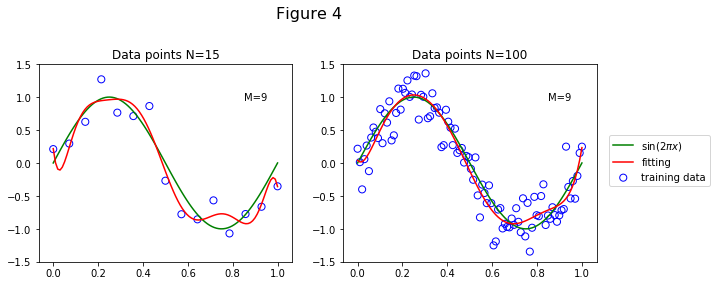

In [8]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    #print(x.shape)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

N=[15,100]
degree=9
fig = plt.figure(figsize=(10, 8))
fig.suptitle("Figure 4", fontsize=16)

for n in range(len(N)):
    x_train, y_train = create_toy_data(func, N[n], 0.25)
    x_test = np.linspace(0, 1, 100)
    y_test = func(x_test)
    
    ax1=plt.subplot(2, 2, n + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    ax1.set_title("Data points N={}".format(N[n]))
    plt.annotate("M={}".format(degree), xy=(0.85, 0.95))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

Plots of the solutions obtained by minimizing the sum-of-squares error function using the $M = 9$ polynomial for $N = 15$ data points (left plot) and $N = 100$ data points (right plot). We see that increasing the size of the data set reduces the over-fitting problem.

## 6.Regularization <a class="anchor" id="6"></a>

For the moment, however, it is instructive to continue with the current approach and to consider how in practice we can apply it to data sets of limited size where we may wish to use relatively complex and flexible models. One technique that is often used to control the over-fitting phenomenon in such cases is that of **regularization**,
which involves adding a penalty term to the error function $E({\theta})$ in order to discourage the coefficients or decrease coefficients or parameters ${\theta}s$ from reaching large values. The simplest such penalty term takes the form of a sum of squares of all of the coefficients, leading to a modified error function
of the form
$$
\tilde{E({\theta})}=\frac{1}{2}\sum_{n=1}^N\{y(x_n, {\theta})-t_n\}^{2}+ \frac{\lambda}{2}\|{\theta}\|^{2}
$$

Where $\|{\theta}\|^{2}\equiv {\theta}^{T}{\theta}= {\theta}^{2}_0 + {\theta}^{2}_1 +.....{\theta}^{2}_M $,
the coefficient $\lambda$  governs the relative importance of the regularization term compared with the sum-of-squares error term. Note that often the coefficient ${\theta}_0$ is omitted from the regularizer because its
inclusion causes the results to depend on the choice of origin for the target variable (Hastie et al., 2001), or it may be included but with its own regularization coefficient. Again, the error function in $\tilde{E({\theta})}$ can be minimized exactly in closed form. **Techniques such as this are known in the statistics literature as shrinkage methods because they reduce the value of the coefficients. The particular case of a quadratic regularizer is called ridge regression** `(Hoerl and Kennard, 1970)`. In the context of neural networks, this approach is known as weight decay.


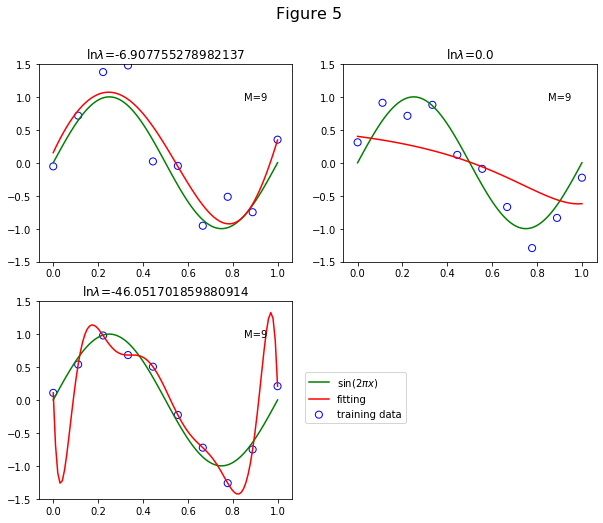

In [9]:
import math

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    #print(x.shape)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

N=10
degree=9
Lambda=[1e-3,1,1e-20] # here lambda value is ln(1e-3)=-6.900 and ln(1)=0 and ln(1e-20 ~ 0)=-46.051 ~ -infinity  
fig = plt.figure(figsize=(10, 8))
fig.suptitle("Figure 5", fontsize=16)

for l in range(len(Lambda)):
    x_train, y_train = create_toy_data(func, N, 0.25)
    x_test = np.linspace(0, 1, 100)
    y_test = func(x_test)
    
    ax1=plt.subplot(2, 2, l + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=Lambda[l])
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    ax1.set_title(r"$\ln\lambda$={}".format(math.log(Lambda[l])))
    plt.annotate("M={}".format(degree), xy=(0.85, 0.95))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

`Figure 5` shows the results of fitting the polynomial of order $M = 9$ to the same data set as before but now using the regularized error function given by $\tilde{E({\theta})}$. We see that, for a value of $\ln\lambda = −6.90$, the over-fitting has been suppressed and we now obtain a much closer representation of the underlying function $sin(2\pi x)$. If, however, we use too large a value for ${\lambda}$ then we again obtain a poor fit, as shown in `Figure` for $\ln\lambda = 0$. Even the case of no regularizer, i.e., $\lambda = 0$, corresponding to $\ln\lambda = −\infty$, is over-fit one as shown at the bottom left of `Figure 5`.


## 7.$E_{RMS}$ vs $\ln\lambda$. <a class="anchor" id="7"></a>
The corresponding coefficients from the fitted polynomials are given in Table below,showing that regularization has the desired effect of reducing the magnitude of the coefficients. The impact of the regularization term on the generalization error can be seen by plotting the value of the $RMS$ error $E_{RMS}$ for both training and test sets against $\ln \lambda$, as shown in `Figure 6`. We see that in effect $\lambda$ now controls the effective complexity of the model and hence determines the degree of over-fitting.

In [10]:
from sklearn.linear_model import Ridge
Coef_1=[]
Intercept_1=[]

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    #print(x.shape)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

N=10
degree=9
Lambda=[1e-3,1,1e-20] # here lambda value is ln(1e-3)=-6.900 and ln(1)=0 and ln(1e-20)=-46.051 ~ -infinity  

for l in range(len(Lambda)):
    x_train, y_train = create_toy_data(func, N, 0.25)
    x_test = np.linspace(0, 1, 100)
    y_test = func(x_test)
    
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = Ridge(alpha=Lambda[l])
    model.fit(X_train, y_train)
    Coef_1.append(model.coef_)
    Intercept_1.append(model.intercept_)

/home/anil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1306e-21): result may not be accurate.
  overwrite_a=True).T


In [11]:
Coef_1=pd.DataFrame(Coef_1,index =[r'$\ln\lambda=-6.90$', r'$\ln\lambda=0$', r'$\ln\lambda=-\infty$'],columns =[r'${\hat\theta}_0$',r'${\hat\theta}_1$',r'${\hat\theta}_2$',r'${\hat\theta}_3$',r'${\hat\theta}_4$',r'${\hat\theta}_5$',r'${\hat\theta}_6$',r'${\hat\theta}_7$',r'${\hat\theta}_8$',r'${\hat\theta}_9$'])
Intercept_1=pd.DataFrame(Intercept_1,columns=['0'])
Coef_1[r'${\hat\theta}_0$']=Intercept_1['0'].values


In [12]:
Coef_1

,${\hat\theta}_0$,${\hat\theta}_1$,${\hat\theta}_2$,${\hat\theta}_3$,${\hat\theta}_4$,${\hat\theta}_5$,${\hat\theta}_6$,${\hat\theta}_7$,${\hat\theta}_8$,${\hat\theta}_9$
$\ln\lambda=-6.90$,-0.143742,6.885765,-12.868175,-3.363298,2.846437,4.631067,3.867811,1.908301,-0.516619,-3.046835
$\ln\lambda=0$,0.422491,-0.410713,-0.422186,-0.290274,-0.149812,-0.029039,0.069394,0.148548,0.212191,0.263614
$\ln\lambda=-\infty$,0.015304,37.488031,-655.295077,5232.791520,-23178.159100,63577.646591,-111113.964690,119160.599138,-70616.994234,17555.930717


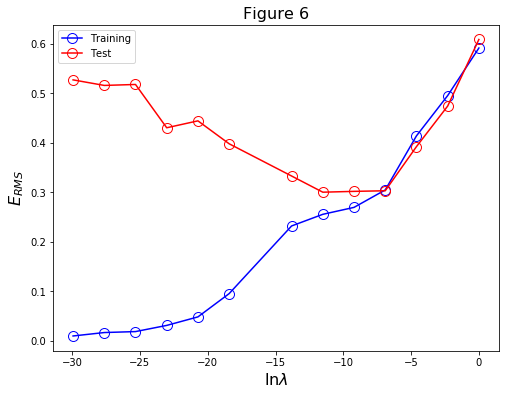

In [56]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []
N=10
degree=9
#Lambda=[1e-30,1e-20,1e-15,1e-10,1e-8,1e-6,1e-5,1e-4,1e-3,1e-2,1]
Lambda=[1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,1]

ln_lambda=[]
for l in range(len(Lambda)):
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=Lambda[l])
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))
    ln_lambda.append(math.log(Lambda[l]))
fig = plt.figure(figsize=(8, 6))
plt.plot(ln_lambda,training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(ln_lambda,test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.title('Figure 6',fontsize=16)
plt.legend()
plt.xlabel(r'$\ln\lambda$',fontsize=16)
plt.ylabel(r"$E_{RMS}$",fontsize=16)
plt.show()

Graph of the root-mean-square error $E_{RMS}$ versus $\ln\lambda$ for the M = 9 polynomial